In [1]:
%matplotlib inline

In [2]:
from kid_readout.measurement.io import npy
from kid_readout.measurement import plot_basic

In [42]:
plot_directory = '/home/flanigan/temp/'

In [3]:
npd = npy.NumpyDirectory('/data/detectors/2017-02-24_153951_scan.npd/')

In [4]:
sweeps = [npd.read(name) for name in npd.node_names() if name.startswith('SweepArray')]
snaps = [npd.read(name) for name in npd.node_names() if name.startswith('ADCSnap')]

In [29]:
# From draw_20160719.py
resonators_per_band = 23
f_low_220 = 1e6 * np.linspace(2542, 2634, resonators_per_band)
f_high_220 = 1e6 * np.linspace(2664, 2756, resonators_per_band)
# Reverse the order of the 150 GHz bands
f_low_150 = 1e6 * np.linspace(2786, 2878, resonators_per_band)[::-1]
f_high_150 = 1e6 * np.linspace(2908, 3000, resonators_per_band)[::-1]
bands = (f_low_220, f_high_220, f_low_150, f_high_150)

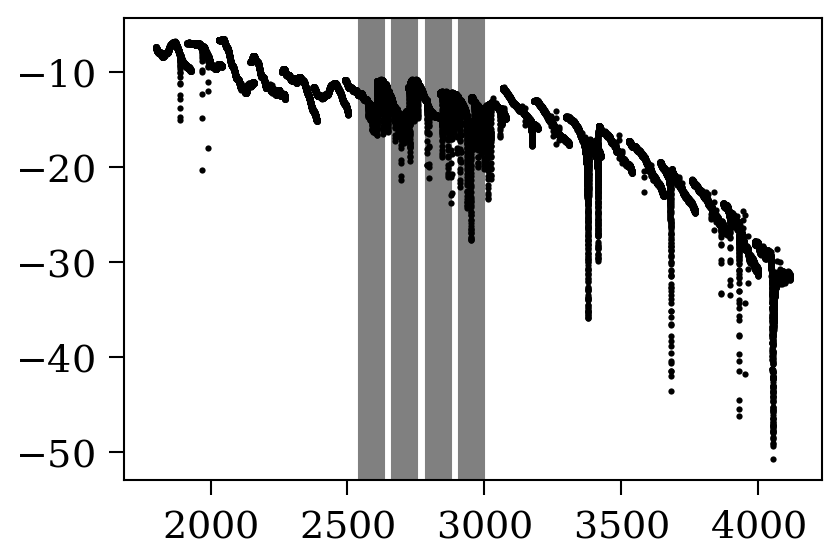

In [31]:
fig, ax = plt.subplots()

for band in bands:
    for f in band:
        ax.axvline(1e-6 * f, color='gray')

for sa in sweeps:
    ax.plot(sa.frequency_MHz, 20 * np.log10(np.abs(sa.s21_point)), '.k')

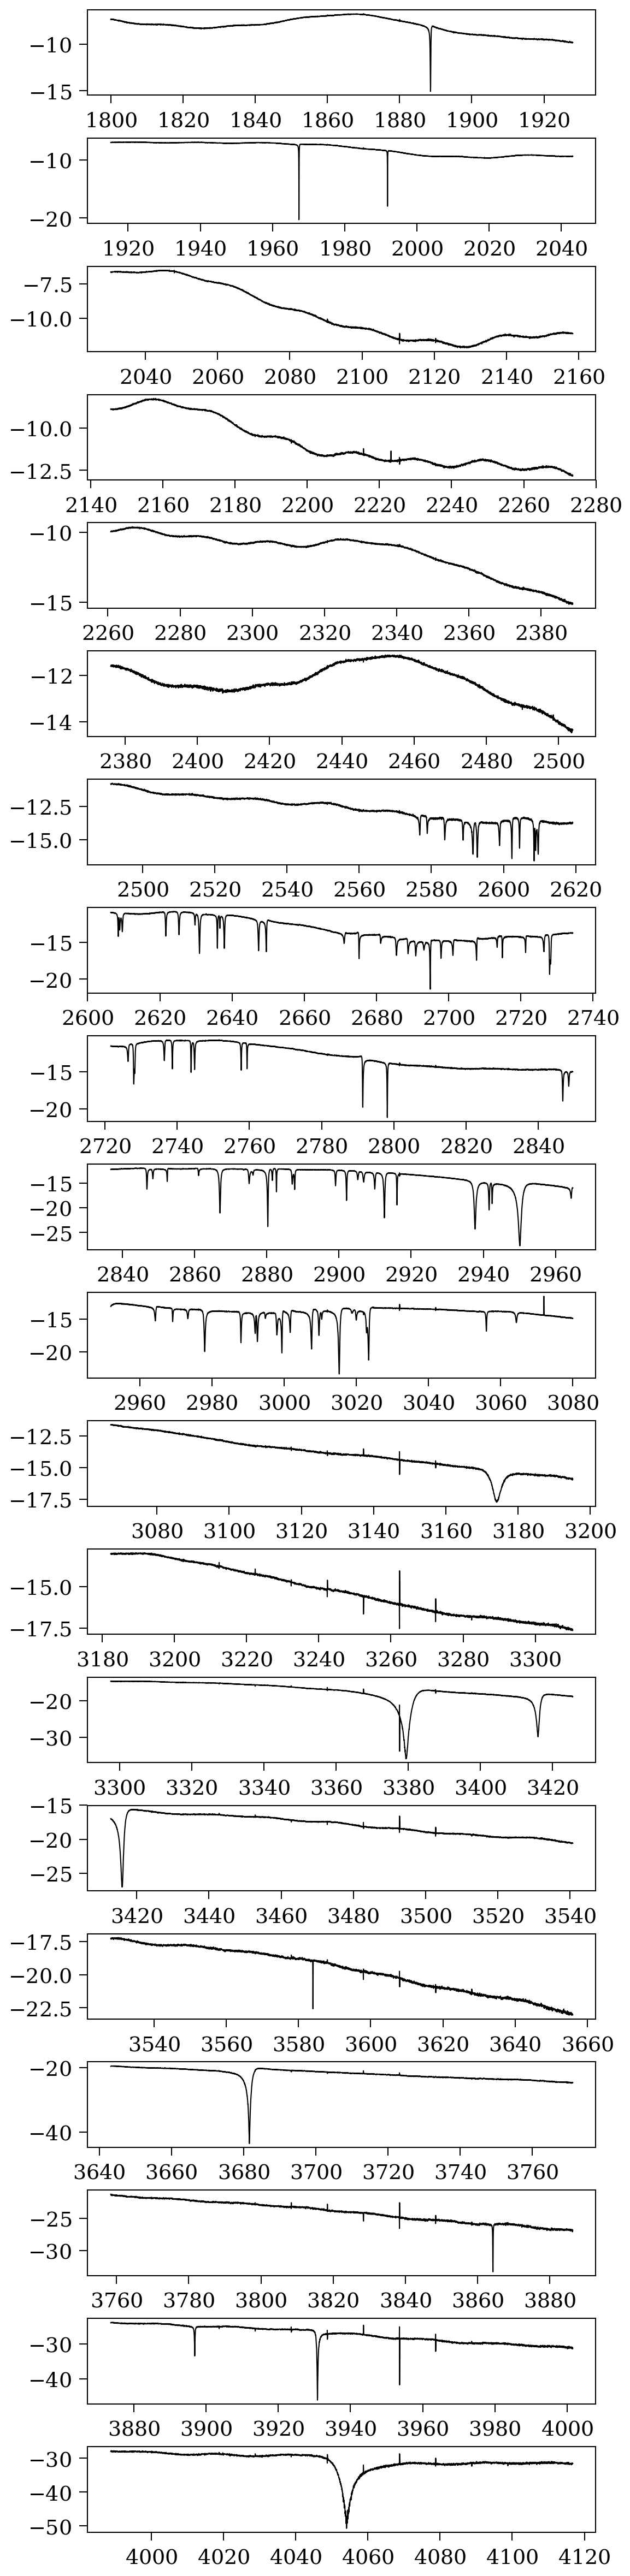

In [9]:
fig, axes = plt.subplots(len(sweeps), 1, figsize=(4, len(sweeps)), gridspec_kw={'hspace': 0.5})
for sa, ax in zip(sweeps, axes.flatten()):
    ax.plot(sa.frequency_MHz, 20 * np.log10(np.abs(sa.s21_point)), '-k')

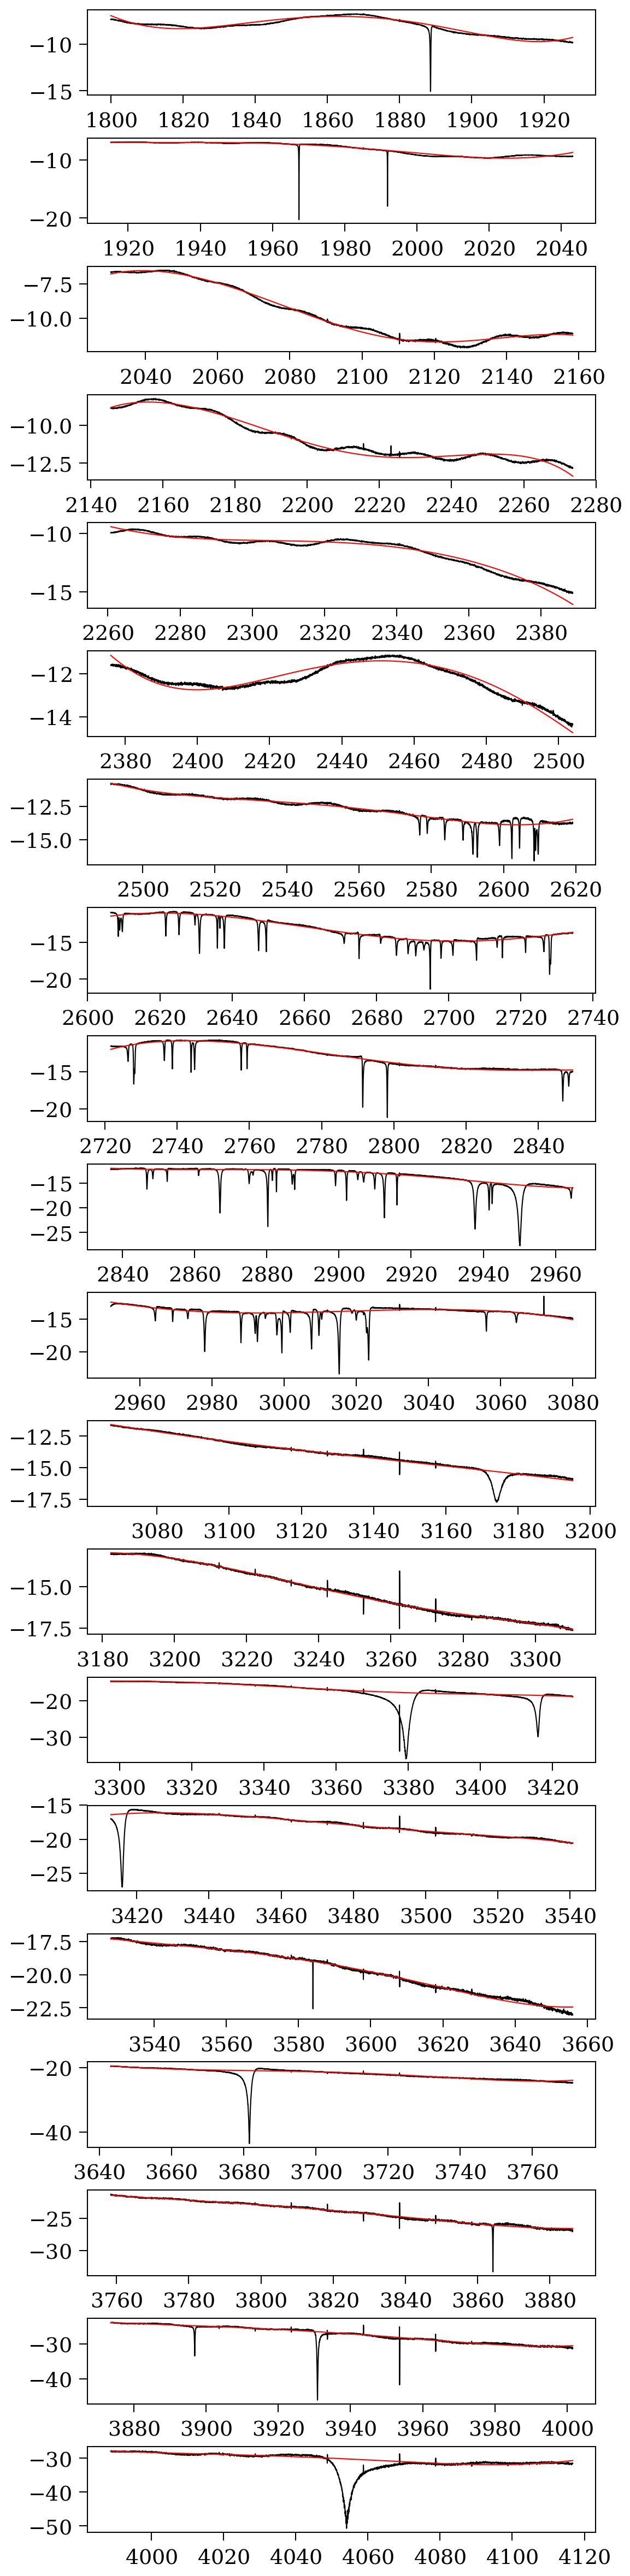

In [27]:
fig, axes = plt.subplots(len(sweeps), 1, figsize=(4, len(sweeps)), gridspec_kw={'hspace': 0.5})
for sa, ax in zip(sweeps, axes.flatten()):
    poly = np.polyfit(sa.frequency_MHz, np.abs(sa.s21_point), deg=4, w=np.abs(sa.s21_point)**2)
    ax.plot(sa.frequency_MHz, 20 * np.log10(np.abs(sa.s21_point)), '-k')
    ax.plot(sa.frequency_MHz, 20 * np.log10(np.polyval(poly, sa.frequency_MHz)), '-r')

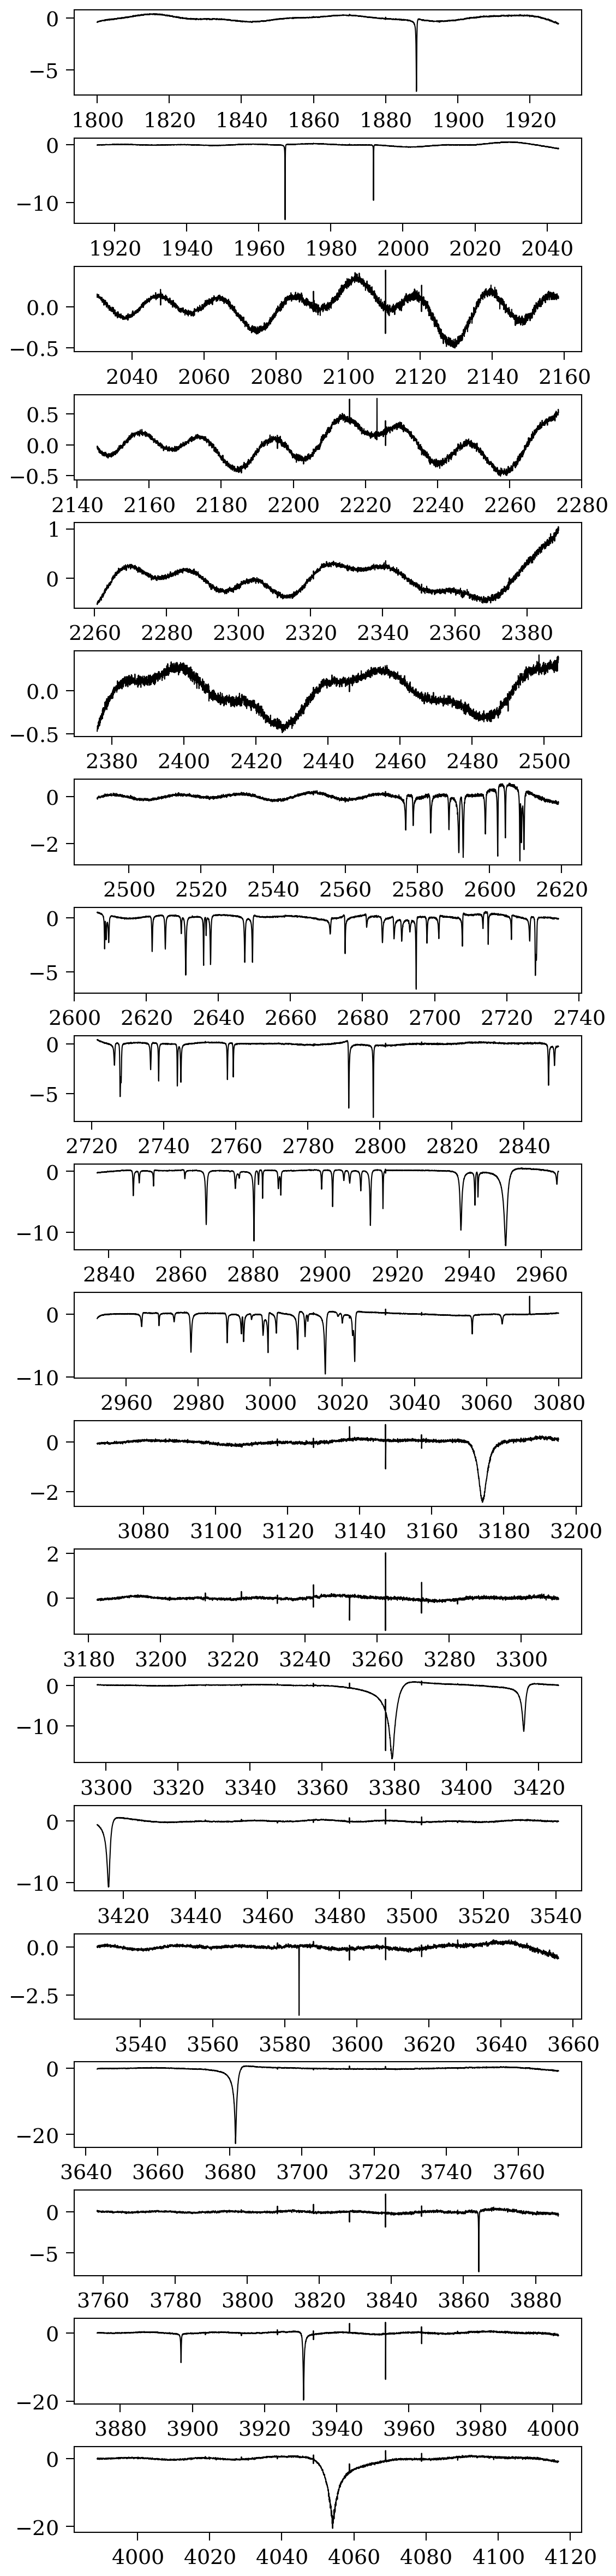

In [26]:
fig, axes = plt.subplots(len(sweeps), 1, figsize=(4, len(sweeps)), gridspec_kw={'hspace': 0.5})
for sa, ax in zip(sweeps, axes.flatten()):
    poly = np.polyfit(sa.frequency_MHz, np.abs(sa.s21_point), deg=4, w=np.abs(sa.s21_point)**2)
    ax.plot(sa.frequency_MHz, 20 * np.log10(np.abs(sa.s21_point) / np.polyval(poly, sa.frequency_MHz)) , '-k')

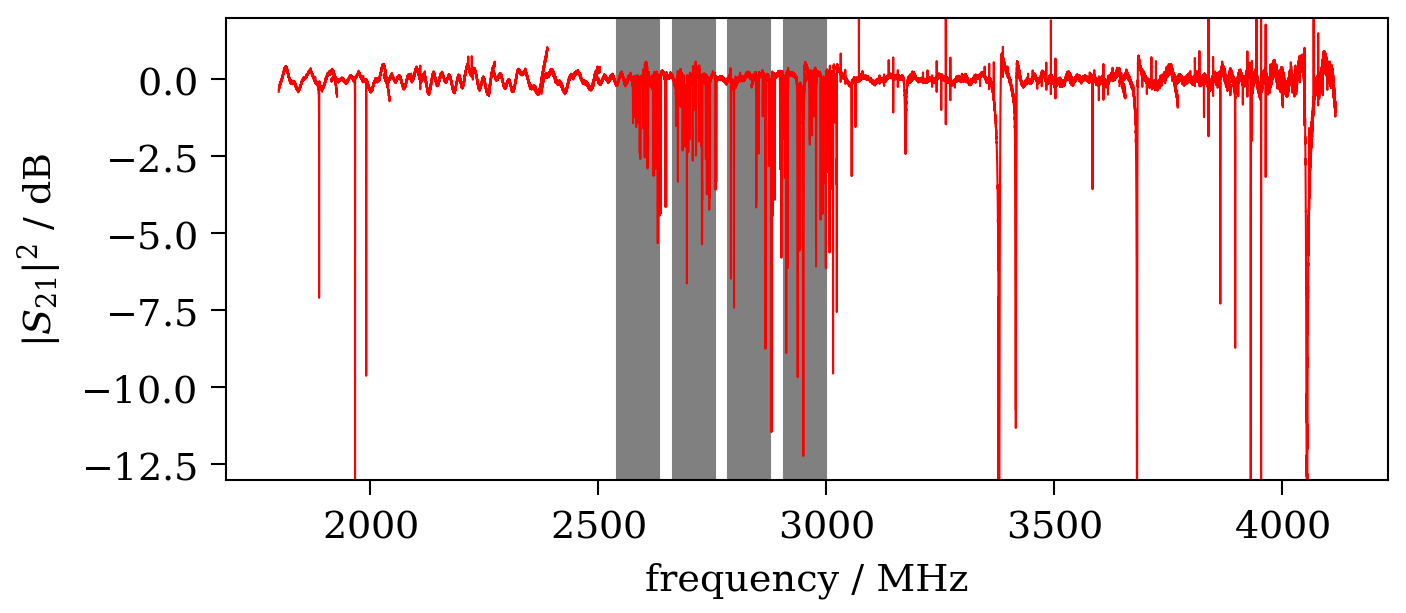

In [46]:
fig, ax = plt.subplots(figsize=(5, 2))
ax.set_xlabel('frequency / MHz')
ax.set_ylabel('$|S_{21}|^2$ / dB')
for band in bands:
    for f in band:
        ax.axvline(1e-6 * f, color='gray')

for sa in sweeps:
    poly = np.polyfit(sa.frequency_MHz, np.abs(sa.s21_point), deg=4, w=np.abs(sa.s21_point)**2)
    ax.plot(sa.frequency_MHz, 20 * np.log10(np.abs(sa.s21_point) / np.polyval(poly, sa.frequency_MHz)) , '-r')
#ax.set_xlim(2510, 3040)
ax.set_ylim(-13, 2)

fig.savefig(plot_directory + 'piecewise_s21_scan_full.pdf')

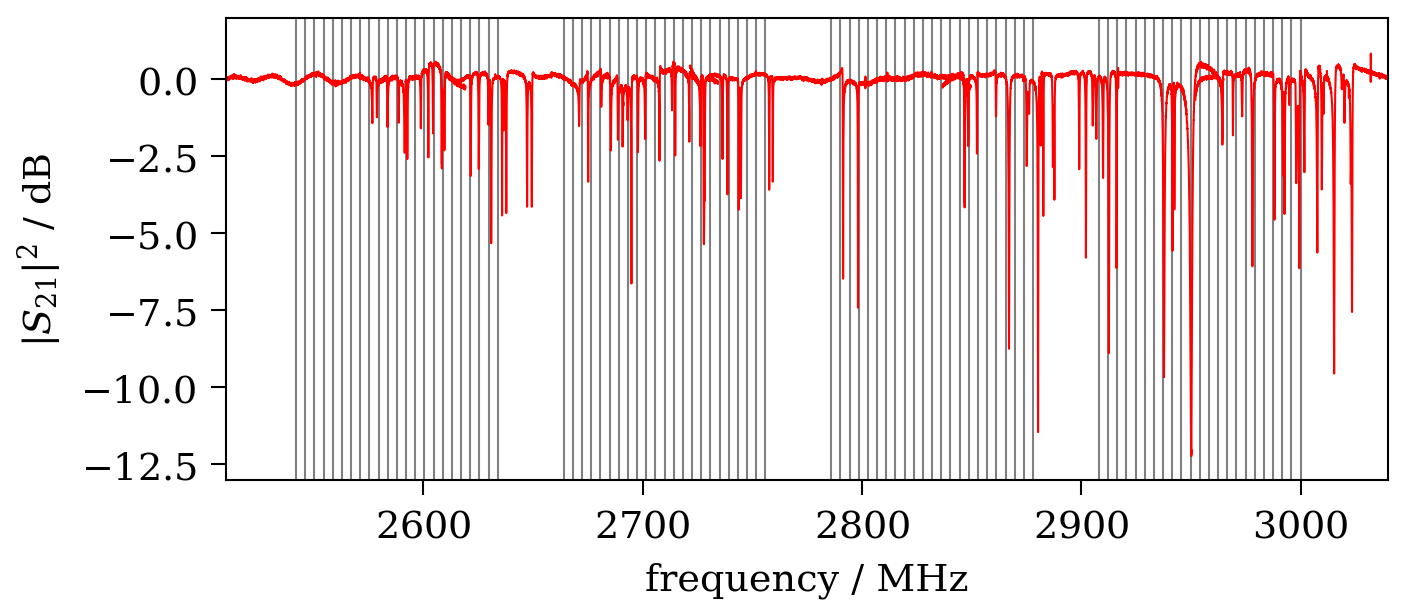

In [48]:
fig, ax = plt.subplots(figsize=(5, 2))
ax.set_xlabel('frequency / MHz')
ax.set_ylabel('$|S_{21}|^2$ / dB')
for band in bands:
    for f in band:
        ax.axvline(1e-6 * f, color='gray')

for sa in sweeps:
    poly = np.polyfit(sa.frequency_MHz, np.abs(sa.s21_point), deg=4, w=np.abs(sa.s21_point)**2)
    ax.plot(sa.frequency_MHz, 20 * np.log10(np.abs(sa.s21_point) / np.polyval(poly, sa.frequency_MHz)) , '-r')
ax.set_xlim(2510, 3040)
ax.set_ylim(-13, 2)

fig.savefig(plot_directory + 'piecewise_s21_scan_band_detail.pdf')